## Observations and Insights 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = study_results.merge(mouse_metadata, on="Mouse ID")
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [47]:
# Checking the number of mice in the DataFrame.
print("Number of Mice:")
combined_df["Mouse ID"].count()

Number of Mice:


1893

In [48]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_df= combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicated_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates(["Mouse ID","Timepoint"], keep = 'first').reset_index()

In [50]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].count()

1888

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

#cleaned_df["Tumor Volume (mm3)"]

#mean1 = cleaned_df["Tumor Volume (mm3)"].mean()
#median1 = cleaned_df["Tumor Volume (mm3)"].median()
#variance1 = cleaned_df["Tumor Volume (mm3)"].var()
#sd1 = cleaned_df["Tumor Volume (mm3)"].median()


#variance1

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

mean_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
SEM_tumor = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [53]:
stats_tumor = pd.DataFrame({"Average Tumor Size":mean_tumor,
                            "Median Tumor Size":median_tumor,
                            "Variance Tumor Size":var_tumor,
                            "Tumor Size Standard Deviation":sd_tumor,
                            "SEM Tumor Size": SEM_tumor})

stats_tumor.sort_values(by="Average Tumor Size")

,Average Tumor Size,Median Tumor Size,Variance Tumor Size,Tumor Size Standard Deviation,SEM Tumor Size
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Propriva,52.393463,50.909965,43.138803,43.138803,0.525862
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Zoniferol,53.236507,51.818479,48.533355,48.533355,0.516398
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466


## Bar Plots

In [54]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

<IPython.core.display.Javascript object>


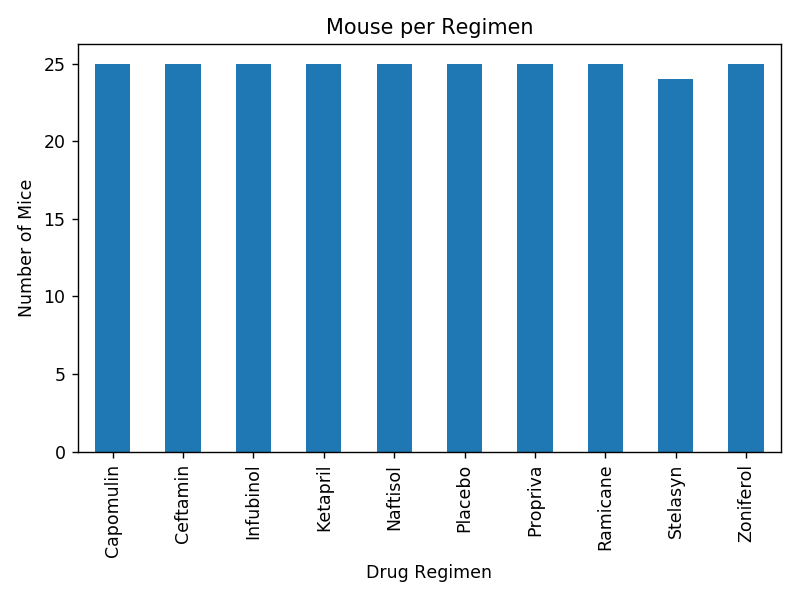

In [55]:
sum_mice = cleaned_df.groupby("Drug Regimen")["Mouse ID"].nunique()


sum_mice.plot.bar(title = "Mouse per Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()

In [56]:
count_mouse = sum_mice.to_list()
mouse_name = sum_mice.keys()

mouse_name

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

<IPython.core.display.Javascript object>


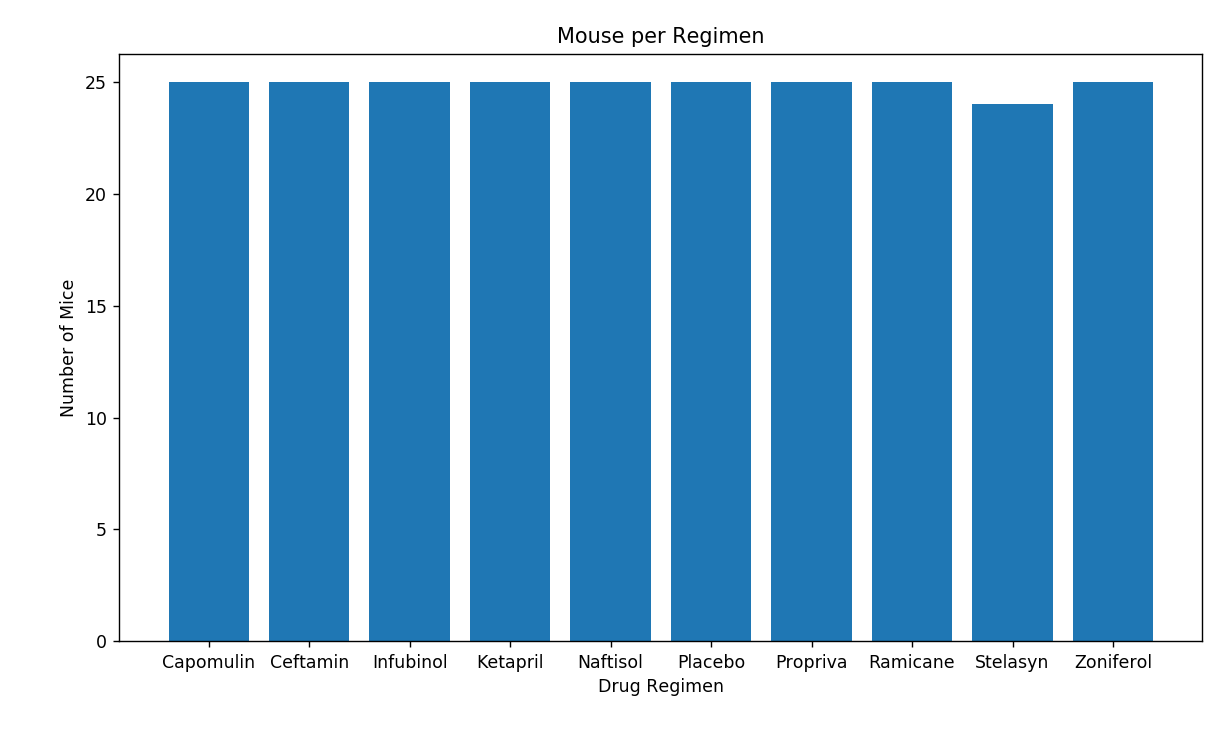

In [61]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
bar_plot = plt.bar(mouse_name, height = count_mouse)


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mouse per Regimen")
plt.tight_layout()

In [62]:
#Finding out unique name of drugs
unique_regiments = cleaned_df["Drug Regimen"].unique()
unique_regiments

#Finding all time points
#Create list for : time point, and count of mice for each time point (per regimen)
time_point = cleaned_df["Timepoint"].unique()
time_point

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [63]:
#1. For loop to get all drug regiments
#------------------------------------

count_by_regimen_df={}
count_by_regimen_list = {}

#1.1 Create series, containing Regimen and mouse count
for x in range(0, len(unique_regiments)):
    count_by_regimen_df[unique_regiments[x]]=cleaned_df[cleaned_df["Drug Regimen"]==unique_regiments[x]].groupby("Timepoint").count()


#1.2 Transform the series into list (using to_list)
for y in range(0, len(unique_regiments)):
    count_by_regimen_list [unique_regiments[y]] = count_by_regimen_df[unique_regiments[y]]["Mouse ID"].to_list()


In [64]:
#2. For Loop, subplot bar creation

#2.1 Automatically Create dimension size

ind = np.arange(len(time_point))
drug_count = len(unique_regiments)
width = 0.12

drug_count = len(unique_regiments)

#2.2 Automatically find dimension of subplot

x = 3
y = drug_count / x

while True:
    x = x-1
    y= drug_count/x
    if drug_count%x == 0:
        break

    
x = int(x)
y = int(y)


<IPython.core.display.Javascript object>


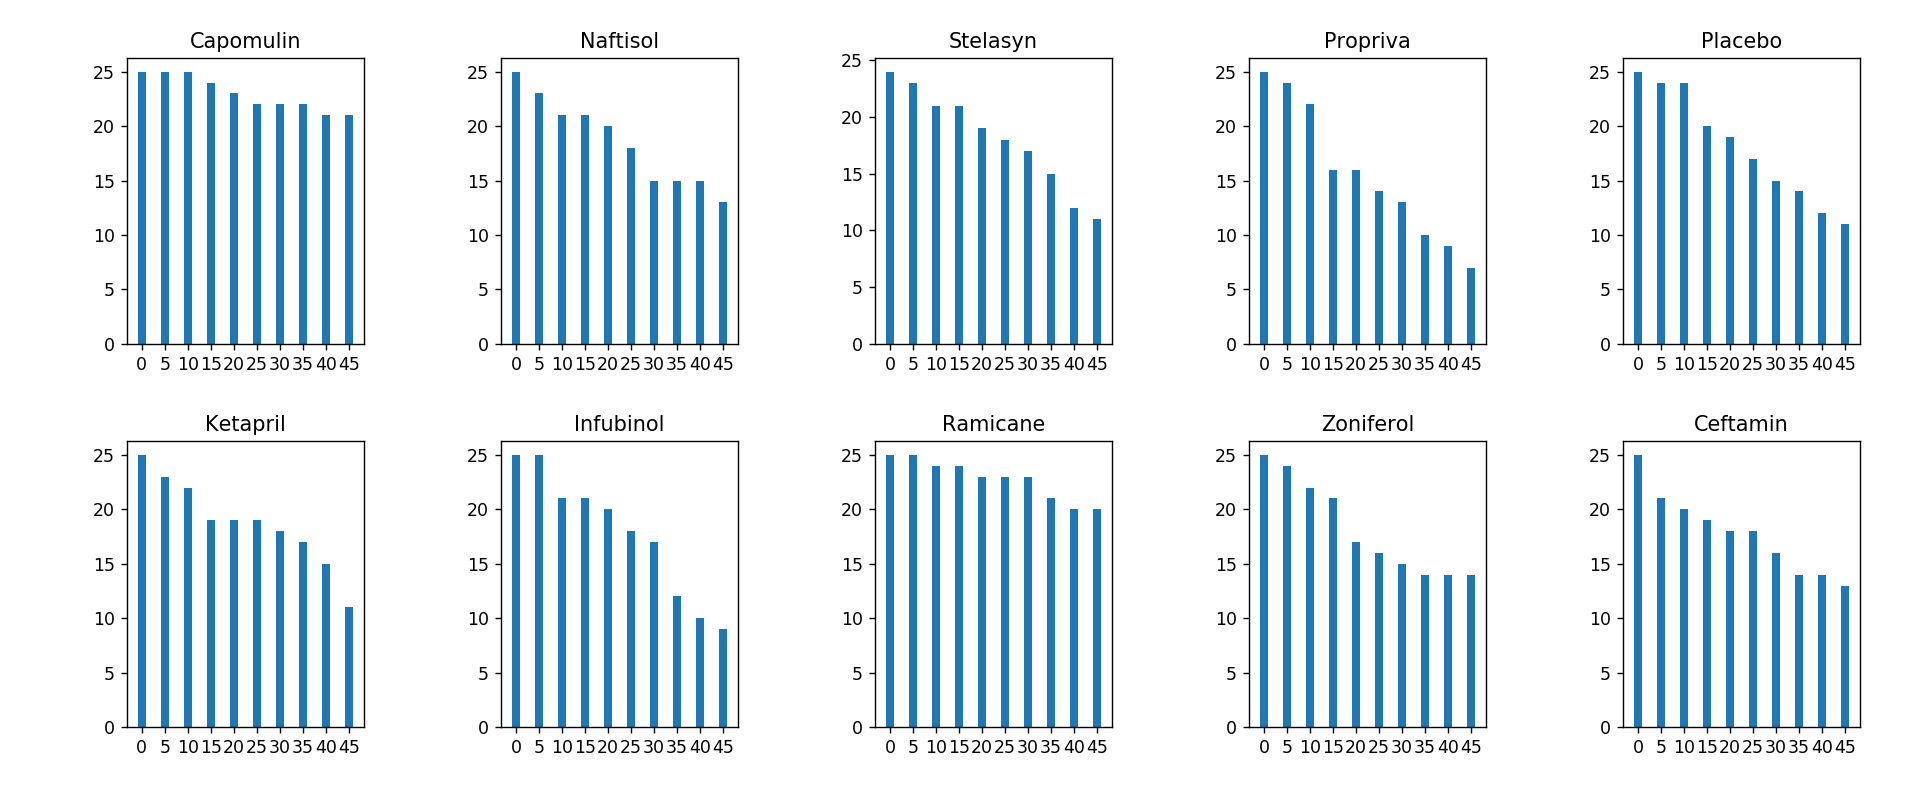

In [65]:
#3.3 Automatically create subplots (Optional)

#for bar index
ind = np.arange(len(time_point)) 

width = 0.35
#subplots and for loops
fig, sub_bar = plt.subplots (int(x),int(y))

i=-1

#
for a in range(0,int(y)):
    for b in range(0,int(x)):
        i = i+1
        sub_bar[b][a].bar(ind, count_by_regimen_list[unique_regiments[i] ], width)
        sub_bar[b][a].set_title(label= unique_regiments[i])
        plt.sca(sub_bar[b,a])
        plt.xticks(ticks = ind, labels = time_point)
        
plt.tight_layout()

## Pie Plots

In [17]:
# 1. Preparing the data
sex_df = combined_df["Sex"].value_counts()

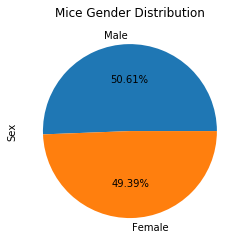

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df.plot.pie(y=sex_df, autopct='%.2f%%', title= "Mice Gender Distribution")

Text(0.5, 1.0, 'Mice Gender Distribution')

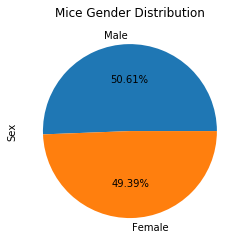

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df, labels = sex_df.index, autopct='%.2f%%')
plt.ylabel("Sex")
plt.title("Mice Gender Distribution")


## Quartiles, Outliers and Boxplots

In [20]:
#1. Get the name of four regimen with smallest average tumour volume.
winner_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

winner1 = combined_df[combined_df["Drug Regimen"]=='Capomulin']
winner2 = combined_df[combined_df["Drug Regimen"]=='Ramicane']
winner3 = combined_df[combined_df["Drug Regimen"]=='Infubinol']
winner4 = combined_df[combined_df["Drug Regimen"]=='Ceftamin']

In [21]:
#Use or tail to get last value
final_tumor1 = winner1.groupby("Mouse ID")["Tumor Volume (mm3)"].tail(1)
final_mice1 = winner1.groupby("Mouse ID")["Mouse ID"].tail(1)

final_tumor2 = winner2.groupby("Mouse ID")["Tumor Volume (mm3)"].tail(1)
final_mice2 = winner2.groupby("Mouse ID")["Mouse ID"].tail(1)

final_tumor3 = winner3.groupby("Mouse ID")["Tumor Volume (mm3)"].tail(1)
final_mice3 = winner3.groupby("Mouse ID")["Mouse ID"].tail(1)

final_tumor4 = winner4.groupby("Mouse ID")["Tumor Volume (mm3)"].tail(1)
final_mice4 = winner4.groupby("Mouse ID")["Mouse ID"].tail(1)




In [22]:
#Reset Dataframe

final_mice1 = pd.DataFrame({"Mouse ID":final_mice1,
                           "Final Tumor Vol(mm3)":final_tumor1})
final_mice1.set_index("Mouse ID", inplace=True)

final_mice2 = pd.DataFrame({"Mouse ID":final_mice2,
                           "Final Tumor Vol(mm3)":final_tumor2})
final_mice2.set_index("Mouse ID", inplace=True)

final_mice3 = pd.DataFrame({"Mouse ID":final_mice3,
                           "Final Tumor Vol(mm3)":final_tumor3})
final_mice3.set_index("Mouse ID", inplace=True)

final_mice4 = pd.DataFrame({"Mouse ID":final_mice4,
                           "Final Tumor Vol(mm3)":final_tumor4})
final_mice4.set_index("Mouse ID", inplace=True)

In [23]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#IQR

iqr1=  st.iqr(final_mice1)
iqr2=  st.iqr(final_mice2)
iqr3=  st.iqr(final_mice3)
iqr4=  st.iqr(final_mice4)
print(f"IQR1: {iqr1} \nIQR2: {iqr2}\nIQR3: {iqr3}\nIQR4: {iqr4}")

#Upper and lower Q
upper_q1 = np.quantile(final_mice1, 0.75)
lower_q1 = np.quantile(final_mice1, 0.25)
upper_q2 = np.quantile(final_mice2, 0.75)
lower_q2 = np.quantile(final_mice2, 0.25)
upper_q3 = np.quantile(final_mice3, 0.75)
lower_q3 = np.quantile(final_mice3, 0.25)
upper_q4 = np.quantile(final_mice4, 0.75)
lower_q4 = np.quantile(final_mice4, 0.25)


upper_bound1 = upper_q1 + 1.5 * iqr1
lower_bound1 = lower_q1 - 1.5 * iqr1
upper_bound2 = upper_q2 + 1.5 * iqr2
lower_bound2 = lower_q2 - 1.5 * iqr2
upper_bound3 = upper_q3 + 1.5 * iqr3
lower_bound3 = lower_q3 - 1.5 * iqr3
upper_bound4 = upper_q4 + 1.5 * iqr4
lower_bound4 = lower_q4 - 1.5 * iqr4





IQR1: 7.781863460000004 
IQR2: 9.098536719999998
IQR3: 11.477135160000003
IQR4: 15.577752179999997


In [24]:
#Outlier
#upper

outlier1 = final_mice1[(final_mice1.iloc[:,0] > upper_bound1) | (final_mice1.iloc[:,0] < lower_bound1)]["Final Tumor Vol(mm3)"].count()
outlier2 = final_mice2[(final_mice2.iloc[:,0] > upper_bound2) | (final_mice2.iloc[:,0] < lower_bound2)]["Final Tumor Vol(mm3)"].count()
outlier3 = final_mice3[(final_mice3.iloc[:,0] > upper_bound3) | (final_mice3.iloc[:,0] < lower_bound3)]["Final Tumor Vol(mm3)"].count()
outlier4 = final_mice4[(final_mice4.iloc[:,0] > upper_bound4) | (final_mice4.iloc[:,0] < lower_bound4)]["Final Tumor Vol(mm3)"].count()

print(f"{winner_drug[0]} has {outlier1} outliers")
print(f"{winner_drug[1]} has {outlier2} outliers")
print(f"{winner_drug[2]} has {outlier3} outliers")
print(f"{winner_drug[3]} has {outlier4} outliers")


Capomulin has 0 outliers
Ramicane has 0 outliers
Infubinol has 1 outliers
Ceftamin has 0 outliers


<IPython.core.display.Javascript object>


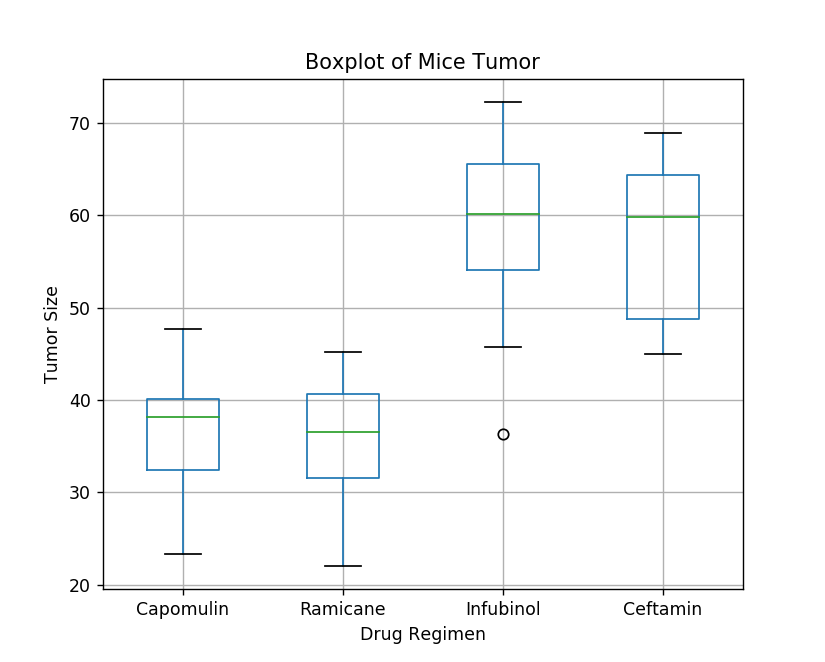

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Combine Dataframes
combined_mice = pd.DataFrame({"Capomulin":final_tumor1,
                             "Ramicane":final_tumor2,
                              "Infubinol":final_tumor3,
                              "Ceftamin":final_tumor4})

plt.title("Boxplot of Mice Tumor")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Size")
win_box = combined_mice.boxplot(column=['Capomulin','Ramicane','Infubinol','Ceftamin'])

## Line and Scatter Plots

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#winner1 is Capomulin only Mice
mouse1 = winner1.iloc[0:10,1:3].set_index("Timepoint")
mouse2 = winner1.iloc[0:10,1:3]

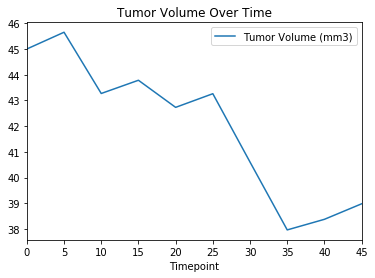

In [27]:

#x = mouse1["Timepoint"]
#y = mouse1["Tumor Volume (mm3)"]

mouse1

lines = mouse1.plot.line(y="Tumor Volume (mm3)", title = "Tumor Volume Over Time")


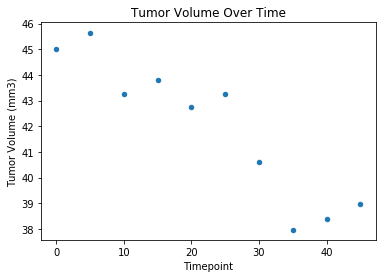

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter = mouse2.plot.scatter(x="Timepoint",y="Tumor Volume (mm3)", title = "Tumor Volume Over Time")

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mean_win1 = winner1.groupby("Mouse ID").mean()
mean_win1 [0:10]
#usepearsonr

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [30]:
tumor_cor = mean_win1["Tumor Volume (mm3)"]
age_cor = mean_win1["Age_months"]


correlation = round(st.pearsonr(tumor_cor,age_cor)[0],4)

print(f"Correlation is {correlation}, and it is weak positive")

Correlation is 0.0152, and it is weak positive


In [31]:
st.linregress(tumor_cor,age_cor)

LinregressResult(slope=0.03674786535977379, intercept=12.542322848264662, rvalue=0.015190045310616808, pvalue=0.9425495676305333, stderr=0.5043813495862064)